# Text Analysis and Visualization of Results

Text analysis focuses on extracting meaningful information and insights from textual data. It is a broad domain that encompasses methods, tools, and techniques to process, analyze, and visualize textual information. Its goal is to analyze text for patterns, structures, and trends.

Text analysis techniques such as 

- Word frequency analysis.
- Sentiment analysis.
- Entity extraction.
- Topic modeling.
- Co-occurrence and network analysis.

have many applications for 
- Social media analysis.
- Literary studies (e.g., distant reading).
- Business intelligence (e.g., customer feedback analysis).
- Historical document analysis.

For the performing these text analysis techniques we need processes that enable computers to understand, interpret, and generate human language. Natural Language Processing (NLP) is a subfield of artificial intelligence (AI) that focuses on a computer’s ability to interpret human language in order to process, analyze, and extract meaning from large volumes of text in natural language. 


In this session, you will first learn about natural language processing with Python, we will then apply these NLP processes for various text analysis techniques. We will be mainly using the leading NLP library `spaCy`. This library can be used to take on some of the most important tasks in working with text. `spaCy` has quickly become one of the most popular Python NLP frameworks; it is intuitive and it has excellent [documentation](https://spacy.io/usage).

To use `spaCy`, we should first install spacy and then import it to our codebase:

In [ ]:
import spacy

For text analysis, `spaCy` relies on statistical language models and trained pipelines. It currently provides official support for more than twenty [languages](https://spacy.io/usage/models). A huge community of developers continuously helps with extending the language data of `spaCy` and improving its performance. `spaCy` also has models trained for mixed-language texts. 

Depending on the language of your text, its length, and complexity, you can choose and download a pre-trained language model to be used. To download a model you can either use [pip](https://spacy.io/usage/models#download-pip) or [spaCy's download command](https://spacy.io/usage/models#download). 

Suppose we want to use the `en_core_web_sm` model which is a relatively small model for the English language with a high efficiency rate. There are other models with higher accuracy but lower efficiency, see [here](https://spacy.io/models/en). Use the following command in your command line to download this language model.

```
python3 -m spacy download en_core_web_sm
```
Once downloaded, you can use the model in your Python script. There is no need to download it again and again.

To use a language model in Jupyter Notebook, it must be downloaded every time the kernel is restarted. You can download a language model in the Jupyter Notebook as shown below: 

In [ ]:
!python3 -m spacy download en_core_web_sm

After the model is downloaded, it can be used to initialize spaCy's NLP [pipeline](https://spacy.io/usage/spacy-101#pipelines)

In [ ]:
nlp_en = spacy.load("en_core_web_sm")
nlp_en # pipeline initialized with English language model

Then you can feed you text into this pipeline that performs a chain of NLP tasks on the text, and returns a `Doc` object containing the results.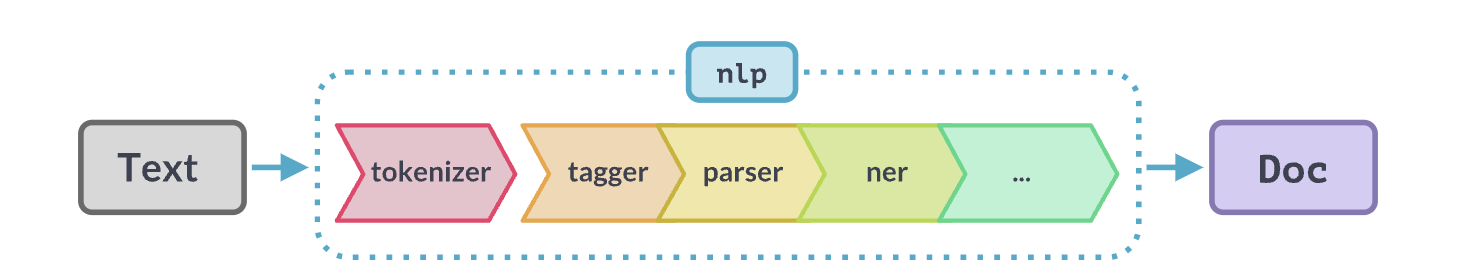

The first task is to break the text into pieces. This process is known as **tokenization**.

## Tokenization:

Tokenization is breaking the raw text into small chunks called **tokens**. A token may be a word, part of a word, or just characters like punctuation. Tokenization is the first step in the text analysis process. 

In the example below, we feed a text to spaCy's pipeline initialized with the loaded English language model. The resulting `Doc` object contains the list of tokens of the text.

In [ ]:
# Feed the text to spaCy pipeline with the trained English model
doc_en = nlp_en("In this beautiful autumn, we learn about NLP.")

print("Tokens:")
for token in doc_en: # print tokens of the text
    print(token)

The resulting object `doc_en` also contains all noun chunks found in the text. You can think of noun chunks as a noun plus the words describing the noun – for example, “the lavish green grass” or “the world’s largest tech fund”. Let's have a look at the noun chunks `spaCy` detected in our text; you can access them using the `noun_chunks` member of the `doc_en` object.

In [ ]:
print("Noun chunks:")
for chunk in doc_en.noun_chunks:
    print(chunk.text) # get the content of the noun chunk

If your text contains multiple sentences, `spaCy` also splits the text into sentences. For example for the following text:

In [ ]:
text = """
In the age of technology, communication has transformed dramatically. 
Social media platforms have reshaped how we interact, fostering connections across the globe. 
Information flows rapidly, enabling us to share ideas, opinions, and experiences in real time. 
However, this constant stream of content also presents challenges: misinformation can spread just as quickly, 
creating confusion and distrust. The digital landscape encourages creativity, allowing voices from diverse backgrounds to be heard. 
Yet, the pressure to maintain an online presence can lead to anxiety and burnout. 
As we navigate this complex environment, it is essential to strike a balance between engagement and self-care. Words have power; they can inspire change, ignite passions, and foster community. 
Through storytelling, we connect with one another, sharing our journeys and building empathy. 
As we embrace the richness of language, let's use it to uplift, educate, and empower ourselves and others.
"""

If we feed it into the pipeline initialized with the English language model, we can access the sentences found in the text through `sents` member of the result

In [ ]:
doc = nlp_en(text)

for sentence in doc.sents:
    print(sentence)

The noun chunks in this text are:

In [ ]:
for chunk in doc.noun_chunks:
    print(chunk.text)

## Part of Speech Tagging

Part of Speech (POS) tagging or grammatical tagging is about identifying the role of each token in the sentence. The POS tags are NOUN (noun), PUNCT (punctuation), ADJ (adjective), ADV (adverb), etc. The trained pipeline and statistical models enable `spaCy` to find the grammatical role of each token in the text and assign a POS tag to it. In simple language, we can say that POS tagging is the process of identifying a word as a noun, pronoun, verb, adjective, etc. To learn more about spaCy's part of speech tagging and its list of POS tags, see this [article](https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/).

Let's have a look at POS tags spaCy has assigned to each token of the text
> "In this beautiful spring, we learn Python."

In [ ]:
# Print the tokens and their part of speech tags
for token in doc_en:
    print(token, "->", token.pos_)

`spaCy` assigns the POS tags defined within Stanford typed dependencies [manual](https://www.studocu.com/de/document/hochschule-harz-fh/ecuanciones/dependencies-manual/92490241)

You can then filter out any linguistic feature you are interested in, for example all the verbs in the text:

In [ ]:
verbs = [token for token in doc_en if token.pos_ == "VERB"]
print("Verbs:", verbs) # list of verbs given in the text

You can access a token's all morphological features using its `morph` member as shown below. 

In [ ]:
for token in doc_en:
    print(token, '->', token.pos_, "\n", '\t', token.morph)

## Dependency Graph

Dependency prasing is about identifying the grammatical dependency between the tokens within the text. For example, which noun an adjective is describing. For that, `spaCy` uses a [dependency parser](https://spacy.io/api/dependencyparser).  

### Visualize Dependency Graph

To see the dependency between the tokens, we can visualize it using [displacy](https://spacy.io/usage/visualizers) class of `spaCy`.

In [ ]:
from spacy import displacy

In a Python script, use the `displacy.serve()` function to visualize the dependency graph of the text. This will spin up a simple web server and let you view the result straight from your browser. In your python script, you can visualize the dependency graph using:

```
displacy.serve(doc_en, style="dep")
```

Jupyter Notebook is already rendered in a browser, so for displaying the dependency graph within Jupyther notebook, you should use `displacy.render()` function, as shown below: 

In [ ]:
displacy.render(doc_en, style = "dep")

**Note:** Each of the dependency tags has a meaning, `amod` stands for `adjective modifier`, `pobj` is `object of a proposition` and so on. To understand the meaning of dependency tags used by `spaCy`, see Stanford typed dependencies [manual](https://www.studocu.com/de/document/hochschule-harz-fh/ecuanciones/dependencies-manual/92490241). 

You can add various visualization options such as line color, background color, font, etc, through the "options" parameter, as shown below:

In [ ]:
vis_options = {'color':'white', 'bg':'black', 'compact': True, 'font':'Times'}
displacy.render(doc_en, style = "dep", options=vis_options)

The `displacy.render()` function returns the graph in the [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics), Scalable Vector Graphics, format that can be rendered on web. In order to store the resulting dependency graph, you can store it as a `.svg` file that can be embedded in any webpage and can be viewed using any web browser. 

In Jupyter Notebook, for SVG to be returned instead of displayed, you should set the parameter `jupyter = False`

In [ ]:
svg = spacy.displacy.render(doc_en, style = "dep", jupyter = False)
with open("sentence_dep.svg", "w",  encoding="utf-8") as file:
    file.write(svg)

**Note:** If you wish to convert an SVG file to an image file, such as PNG using Python, you should 
- install [cairo](https://www.cairographics.org/download/) on your system, then either
   - install `CairoSVG` Python package and use `svg2png` function to convert SVG to PNG
   - install `svglib` Python package and use `svg2rlg` function to convert SVG to PNG
More information on dependency and code snippets can be found [here](https://medium.com/@prasadfernando90/how-to-convert-svg-to-png-in-python-4c655c59a571)

### Example: Analyze a German Text

Let's have a look at an example in German. To analyze texts in German, you need a model trained for German language texts. For higher accuracy, I have chosen the `de_core_news_lg`, there are other pre-trained models [available](https://spacy.io/models/de) that you can choose from. Again first, you should download the model and then load it.

In [ ]:
!python3 -m spacy download de_core_news_lg

In [ ]:
nlp_de = spacy.load("de_core_news_lg")

Now we can use this German-language model to analyze a German text:

In [ ]:
doc_de = nlp_de("Heute ist ein kalter Tag.")
for token in doc_de:
    print(token, token.pos_)      

Now let's have a look at the dependency graph of this German Text.

In [ ]:
spacy.displacy.render(doc_de, style = "dep")  

**Note:** The German model is not as good as the English one, after all, German has a more complex grammatical structure. The separable verbs in German make things even more complex. The chosen model nonetheless has an accuracy rate of 98% for POS tagging.

In the next step of its default text analysis [pipeline](https://spacy.io/models#design-cnn), spaCy recognizes the named entities given in the text.

## Named Entity Recognition

[Named Entity Recognition](https://en.wikipedia.org/wiki/Named-entity_recognition) (NER) locates named entities given in the text and classifies them into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc. 

It helps with answering real-world questions, such as 

- How many times a certain organization was mentioned in a text?
- Were specific products mentioned in complaints or reviews?
- Does the tweet contain the name of a person? does the tweet contain the location of a person?

`spaCy` features an extremely fast statistical [entity recognition system](https://spacy.io/usage/linguistic-features#named-entities), that assigns labels to contiguous spans of tokens.  `spaCy` can recognize various types of named entities in a document by asking the model for a prediction. Because models are statistical and strongly dependent on the examples they were trained on, this doesn’t always work perfectly and might need some tuning later depending on your use case.

`spaCy` recognizes the named entities in the text and tags them with their types. Using `ents` member of the spaCy `Doc` object, we can access the recognized named entities. For each named entity, its label indicating the type of the entity, as well as the start and end position of that named entity within the text is given: 

In [ ]:
text = ("Over 100 Allied bombers and their crews were interned during the war. \
        Between 1940 and 1945, Switzerland was bombed by the Allies causing \
        fatalities and property damage. \
        Among the cities and towns bombed were Basel, Zurich, Geneva, among others.")

doc_wwII = nlp_en(text)

for entity in doc_wwII.ents: # get named entities, their labels, and their positions in the text
    print(entity.text, "->", entity.label_, ", position:", "[", entity.start_char, ",", entity.end_char, "]")

The accuracy of the named entity recognition (NER) using the chosen model `en_core_web_sm` is only 85%. For a better accuracy rate, you can use other models such as `en_core_web_trf` which has an accuracy rate of 90% for NER.

### Visualization of Named Entities in Text

The entity visualizer method of the `displacy` class, with visualization style parameter `style="ent"`, highlights named entities and their labels in a text. 

In a Python script, use the` displacy.serve()` function to get the visualization of the text with recognized named entities. It returns the text with tagged named entities as an HTML document. This function will spin up a simple webserver to let you view the result straight from your browser. It can be used as shown below:

```
displacy.serve(doc_wwII, style="ent")
```

Jupyter notebook is already running in the browser, and can directly render and display HTML documents. Therefore, to visualize the text with tagged named entities in Jupyter Notebook, you can use the `displacy.render()` function as shown below:

In [ ]:
displacy.render(doc_wwII, style="ent")

You can store this annotated text with labeled named entities in an HTML file. The labeling of the named entities is defined as CSS (stylesheet) of the HTML document. The resulting HTML document can be opened in any browser and embedded in any website. 

In Jupyter Notebook, to get the HTML document from the `displacy.render()` function, you should use the `jupyter = False` parameter, as shown below:

In [ ]:
# Get the HTML document with text and tagged named entities
html = displacy.render(doc_wwII, style="ent", jupyter = False)

# write the HTML document to a new file
with open("named_entities.html", "w", encoding = "utf-8") as output_file:
    output_file.write(html)

**Note:** As mentioned before, the accuracy of the NER process is dependent on the chosen model and its training samples. Still, the best English pre-trained model of spaCy has an accuracy rate of 90% for NER. The NER algorithms might fail to correctly tag names that can be used for different types of entities; for example Mendoza as a person, and Mendoza which is a city in Argentina. You can however either simply correct the wrong labels by editing the resulting HTML document, or you can train your own model and load it to be used for tokenization and named entity recognition. Guidelines for that can be found [here](https://spacy.io/usage/training).

The last task in the default pipeline of spaCy is **lemmatization**.

## Term freuqency analysis

Term Frequency Analysis is a fundamental text analysis technique used to measure how often specific terms (words or phrases) appear in a given document or collection of documents (corpus). It helps identify patterns, important keywords, or frequently discussed topics within the text.

For the term freuqncy analysis, the first step is lemmatization:

### Lemmatization:

Lemmatization is a text normalization technique in the field of Natural Language Processing. It is used to prepare text, words, and documents for further processing. Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. It is one of the most common text pre-processing techniques used in NLP and machine learning in general, this is essential for term frequency analysis. Examples of lemmatization:

```
play, playing, played, plays -> play
am, is, are, were, was -> be
good, best -> good
corpora -> corpus
```

After tokenization and dependency parsing of a text, NLP pipeline of `spaCy` identifies the lemma of each token (stem of the word). The lemma of a token is accessible through its `lemma_` member. For example:

In [ ]:
test_text = """Yesterday John was playing in the garden.\
Even though he played for hours yesterday, he plays again today. He has many toys to play with."""

test_doc = nlp_en(test_text)
for token in test_doc:
    print(token, "-> ", token.lemma_)

Now we can ask questions like:
- How many times `play` was mentioned in this text?

In [ ]:
len([token for token in test_doc if token.lemma_ == 'play'])

Let's put the lemmas of tokens together to get the lemmatized form of the text:

In [ ]:
" ".join([token.lemma_ for token in test_doc])

Lemmatized form of text is easier to analyze for machines and is widely used in tagging systems and indexing, Web search results, and information retrieval. 

**Find the normalized frequency of a term in a document:**

$\text{tf}=\frac{\text{frequency of a term in the text}}{\text{total number of words in the text}}$


To calculate the normalized frequency of a term, we need to divide the frequency of the term with the total number of words in the document. To get a better approximation, instead of considering all tokens in the document, 

1. we should count tokens in the text which are not punctuations
2. we should count only tokens that matter, convey a meaning

A natural language text contains many words that are added to to the text for grammatrical reasons or smoothness but do not necessarily convey a meaning. For example, in "has been studying", the only word that matters is "studying" and "has" and "been" are only there for grammatical reasons. These two words are not really important for analysis of term frequency in a document. Therefore, before performing the term frequency analysis, we not only need to lemmatize the text, we should also remove punctuations and **stop words** from it. These are the words that do not add much to the meaning of the document. Generally, the most common stop words used in a text are "the", "is", "in", "for", "where", "when", "to", "at" etc. 

The `Cleaner` module of `spaCy` can be used to remove stop words, punctuations and for leammatization of a text, preparing it for frequency analysis.

Since out text is in English, we use the previously initialized English pipeline `nlp_en` for the `Cleaner` module, as shown below: 


In [ ]:
from spacy_cleaner import Cleaner
from spacy_cleaner.processing import removers, replacers, mutators

cleaner = Cleaner(
    nlp_en,
    removers.remove_stopword_token,
    removers.remove_punctuation_token,
    mutators.mutate_lemma_token,
)

Now our cleaner is ready to be used for cleaning the text from noises for term frequency analysis. Let's study the freuency of terms in the following text. Our goal is to find the most frequent words in the text without closely reading it:

In [ ]:
doc_1 = """
Love is a powerful emotion that shapes human relationships, bonds, and cultures. From the deep affection shared between family members to the romantic love that inspires passion, devotion, and creativity, its presence is universal. People often express love through actions, words, affection, and even silence, as love transcends language barriers and cultural divides.

The love of a mother for her child is often described as unconditional, reflecting care, devotion, and compassion. Similarly, the love between friends fosters trust, loyalty, and attachment, creating bonds that endure time. Romantic love, with its intensity and passion, can spark joy and excitement while also exposing vulnerability. Despite challenges, love remains a force that connects, heals, and transforms individuals and societies.

Philosophers and poets have pondered the essence of love for centuries. Is love merely an emotion, a deliberate act of devotion, or a primal biological drive? Religious teachings often emphasize love as a virtue, encouraging compassion, empathy, and a love for humanity. Literary works overflow with depictions of love, from Shakespeare’s tragic tales of romantic passion to contemporary stories of enduring affection and resilient bonds.

While love brings joy and meaning, it can also lead to heartbreak and loss. Unrequited love or the grief of losing a cherished bond can leave profound scars. Yet, humanity continuously seeks love in its many forms, drawn by the hope, connection, and purpose it offers.

In every aspect of life, love—whether romantic, platonic, or familial—remains a cornerstone of human existence. Love, with its compassion, affection, and passion, binds individuals, inspires art, and fosters deep attachments. It is more than a feeling; it is the foundation of life’s most meaningful bonds.
"""

In [ ]:
clean_document = cleaner.clean([doc_1])[0]
clean_document

Now we can calculate the normalized frequency of each term in this clean text.

How many times the word **love** is mentioned in the text?

In [ ]:
count_love = clean_document.count('love')
count_love

Total number of proper terms in this document:

In [ ]:
# words in the document
words = clean_document.split()
n_words = len(words)
n_words

The normalized frequency (**tf**) of the term `love` is:

In [ ]:
tf_love = count_love / n_words
tf_love

Let's create a database of the terms in this text, containing the frequency of each term (i.e. the count), and its normalized frequency (tf).
Our database will have a tabular structure, where each row represents a unique word in this text:

In [ ]:
unique_words = set(words)
len(unique_words)

In [ ]:
import pandas as pd

# Step 1: Create an empty DataFrame with specified columns
tf_dataframe = pd.DataFrame(columns=["Term", "Count", "tf"])

# Step 2: Add rows one by one
for term in unique_words:
    count_word = clean_document.count(term)
    tf = count_word/n_words
    tf_dataframe.loc[term] = [term, count_word, tf]


In [ ]:
tf_dataframe

Show me 15 most frequent words in this text:

In [ ]:
top_15_terms = tf_dataframe.nlargest(15, 'tf')[['Term', 'Count', 'tf']]
top_15_terms

Let's store this database as CSV or Excel file for future analysis:

In [ ]:
!pip install openpyxl

In [ ]:
with pd.ExcelWriter('term_frequency.xlsx') as writer:  
    tf_dataframe.to_excel(writer, sheet_name='tf')

### Visualize the term frequency data

Let's create a bar plot representing the 15 most frequent terms in our text:

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_15_terms['Term'], top_15_terms['Count'], color='skyblue')
plt.xticks(range(0,18))
plt.xlabel('Count')
plt.title('Top 15 Most Frequent Terms')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### Wordcloud
A word cloud is a visual representation of text data, where individual words are displayed in varying sizes based on their frequency or importance within a given text. In a word cloud:
- Frequent words appear larger and bolder.
- Less frequent words are smaller and may be lighter in color.
Word clouds are often used to quickly convey the main themes or topics present in a body of text, making it easier to identify key concepts at a glance.

Now, let's create a wordcloud representing the most frequent terms in the text.

In [ ]:
from wordcloud import WordCloud

tf_dict = dict(zip(top_15_terms['Term'], top_15_terms['tf']))

wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis', scale=2).generate_from_frequencies(tf_dict)

# Plot the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('15 most frequent terms')
plt.show()

## Finding the importance of a term in a corpus (**tf-idf**)

A part of text analysis is studying importance of a term in an entire corpus. TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents, a corpus.

- **Term Frequency (TF):** The number of times a term appears in a document.
- **Inverse Document Frequency (IDF):** A measure of how much information the word provides, i.e., whether the term is common or rare across all documents in the corpus.

$ \text{tf-idf}(t) = tf(t, d) \times idf(t)$

where

$idf = \log(\frac{| d \in D: t \in d | }{N})$

Where $N$ is the total number of documents in the corpus, $d \in D: t \in d$ is the number of documents in the corpus containing the term $t$.

This is a bit more technical topic out of scope of this talk. If you are interested, you can have a look at the tutorial [here](https://www.geeksforgeeks.org/visualizing-tf-idf-scores-a-comprehensive-guide-to-plotting-a-document-tf-idf-2d-graph/).

## Topic Modeling

Topic modelling is an unsupervised method of identifying topics within a document or a corpus. With the increase of digitized text such as emails, tweets, books, journals, articles, and more, Topic modelling remains one of the most important techniques to identify and automate the classification of such documents into categories or topics wherever necessary.

There are many standard methods to approach topic modelling with some of the popular ones being Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF). The most common method is LDA, we model documents as distributions of (independent-ish) topics which are themselves distributions of words.

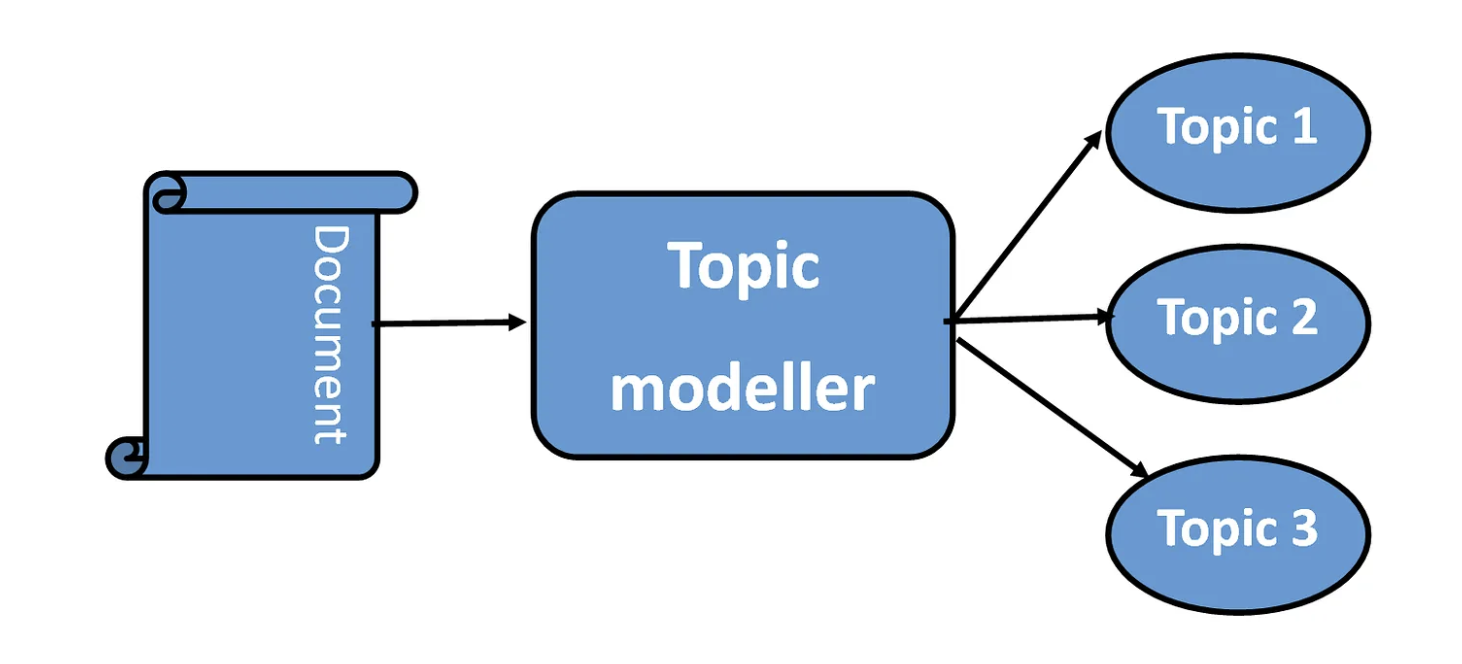


To perform a topic modeling, we need a corpus (collection of text documents). Let's create a corpus containing our previous text `doc_1` and some other texts.

In [ ]:
# Creating a corpus of documents
doc_2 = """
A whopping 96.5 percent of water on Earth is in our oceans, covering 71 percent of the surface of our planet. This vast reservoir plays a 
critical role in regulating the Earth's climate, acting as a heat sink and driving weather patterns. And at any given time, about 0.001 
percent of Earth's water is floating above us in the atmosphere as water vapor. If all of that vapor condensed and fell as rain at once, 
the entire planet would receive about 1 inch of rainfall, demonstrating the delicate balance of the water cycle.

Water is unique in that we experience it in all three states of matter—solid ice, liquid water, and gaseous water vapor—within the natural 
environment. This remarkable property is due to water's hydrogen bonding and its ability to transition between phases with relative ease. 
Ice caps and glaciers, which store about 1.7 percent of Earth's water, play a critical role in reflecting sunlight and regulating global 
temperatures. Liquid water, found in rivers, lakes, and aquifers, supports ecosystems, provides drinking water, and is essential for 
agriculture and industry. Water vapor, though present in minute quantities, significantly influences weather and climate by trapping heat 
in the atmosphere.

Beyond its scientific significance, water is a cornerstone of life. Every living organism relies on water for survival, from microscopic 
bacteria to massive blue whales. Its ability to dissolve a wide range of substances makes it an excellent medium for transporting nutrients 
and waste in biological systems. Water’s unique properties, including its high heat capacity and surface tension, are vital to sustaining 
life and shaping the planet's physical and biological systems.

As the global population grows, the demand for freshwater—a mere 2.5 percent of the Earth's total water supply—continues to rise. 
Yet, much of this freshwater is locked away in glaciers and inaccessible aquifers. This scarcity underscores the need for sustainable 
water management and conservation practices to ensure a stable supply for future generations.

Water is not just a resource but a life-giving force, shaping our world in profound ways. Its journey through the oceans, atmosphere, 
and land creates a dynamic system that sustains life and defines the natural beauty of our planet. Understanding and preserving this 
cycle is essential for maintaining the delicate balance of life on Earth.
"""

doc_3 = """
One-third of your life is spent sleeping. Sleeping 7-9 hours each night should help your body heal itself, activate the immune system, 
and give your heart a break. Adequate sleep is crucial for cognitive functioning, memory consolidation, and emotional regulation, 
laying the foundation for overall well-being. Beyond that—sleep experts are still trying to learn more about what happens once we fall asleep. 
Research continues to uncover the complexities of the sleep cycle, including how REM sleep is linked to creativity and problem-solving, and how deep 
sleep contributes to physical recovery and growth.

Despite its importance, some individuals have tested the limits of sleep deprivation. While still in high school, 
a student named Randy Gardner went 264.4 hours without sleep, setting a world record and earning first place at the 10th 
Annual Great San Diego Science Fair in 1964. His experiment shed light on the dramatic effects of prolonged sleeplessness, 
including mood swings, cognitive impairment, and hallucinations. Gardner's case became a pivotal moment in sleep research, 
prompting scientists to further investigate the dangers of sleep deprivation and its impact on the brain and body.

Today, we know that chronic lack of sleep is linked to a host of health issues, such as cardiovascular disease, diabetes, 
and mental health disorders. Yet, the fascination with sleep deprivation persists, often fueled by cultural attitudes that 
equate sleeplessness with productivity and resilience. Modern sleep science emphasizes the value of prioritizing rest, not 
only to prevent health problems but also to optimize performance and passion in daily life.

As the mysteries of sleep continue to unravel, it’s clear that sleep is not merely a passive state of rest but an active 
process vital for human survival and flourishing. By understanding and respecting the need for quality sleep, we can better 
appreciate its role in a healthy, balanced, and fulfilling life.."""

doc_4= """
Passion often feels boundless, driving individuals to pursue their goals with energy and intensity. However, this enthusiasm requires a solid foundation of physical and mental well-being. 
Sleep and water consumption, though often overlooked, are essential pillars that sustain passion and ensure it flourishes over time.

Sleep plays a critical role in fueling passion. During deep sleep, the brain consolidates memories, processes emotions, and restores cognitive functions. 
Without adequate rest, enthusiasm and focus wane, making it harder to sustain the drive necessary for creative and meaningful pursuits. Passion thrives on mental clarity, 
and sleep provides the rejuvenation needed to maintain this clarity, ensuring that the energy for one’s goals remains steadfast.

Hydration is equally vital for sustaining passion. Water is fundamental to almost every bodily process, 
from regulating body temperature to maintaining cognitive function. Even mild dehydration can impair concentration, 
diminish mood, and lower energy levels—factors that can directly undermine the intensity and drive behind one’s pursuits. 
Staying hydrated supports sustained effort, keeping the mind sharp and the body energized to tackle challenges with zeal.

The interplay between sleep and hydration further influences passion. Poor sleep can disrupt the body’s balance, 
leading to increased dehydration due to hormonal shifts. Similarly, dehydration can interfere with sleep quality, 
creating a cycle that saps energy and dulls the enthusiasm needed to pursue one’s passions. Balancing these elements creates a 
strong foundation for mental and physical resilience, essential for maintaining the fervor that passion demands.

Passion, while a powerful force, requires care to sustain. Prioritizing sleep and water consumption ensures that the energy, 
focus, and drive behind passionate endeavors are not only maintained but also amplified. By respecting these fundamental needs, 
individuals can fully engage with their passions, achieving their goals with vigor and enduring enthusiasm.
"""

# Create corpus
corpus = [doc_1, doc_2, doc_3, doc_4]

Before starting with the topic modeling, let's clean our text using the `spaCy` cleaner we generated before. In this way, are removing punctuations, and stopwords, and also lemmatizing the words. 

In [ ]:
clean_corpus = cleaner.clean(corpus)
clean_corpus

In [ ]:
# import all necessary libraries
import numpy as np
from gensim import corpora, models
from sklearn.preprocessing import normalize
from scipy.stats import pearsonr

In [ ]:
# Preprocessing: Tokenize and create a dictionary
texts = [doc.split() for doc in clean_corpus]
dictionary = corpora.Dictionary(texts)
bowle_of_words = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim.models import LdaModel

# LDA model
lda_model = LdaModel(bowle_of_words, num_topics=3, id2word = dictionary)

# Create a topic-document matrix
num_topics = lda_model.num_topics
topic_document_matrix = np.zeros((len(corpus), num_topics))

for i, doc_bow in enumerate(bowle_of_words):
    # Get topic distribution for each document
    topic_dist = lda_model.get_document_topics(doc_bow, minimum_probability=0)
    for topic_id, prob in topic_dist:
        topic_document_matrix[i, topic_id] = prob

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(topic_document_matrix, columns=[f'Topic {i+1}' for i in range(num_topics)])

# Compute the correlation matrix
correlation_matrix = df.corr()

topics = ['Topic 1', 'Topic 2', 'Topic 3']

# Display the correlation matrix
print("Correlation matrix of topics:")
print(correlation_matrix)

In [ ]:
# Print the topics with top words and their probabilities
num_words = 3  # Number of top words you want to display for each topic
for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=num_words, formatted=True):
    print(f"Topic {i+1}: {topic}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, xticklabels=topics, yticklabels=topics,
            cmap='Blues', cbar_kws={'label': 'Correlation Intensity'})
plt.title("Heatmap of Topic Correlations")
plt.show()

In this heatmap:

1. Each cell represents the correlation between two topics.
2. The color intensity reflects the strength of the correlation, with a color bar to indicate values.
These two visualizations (cluster graph and heatmap) complement each other well, giving insights into the structure of topics and the intensity of their relationships.

# Cluster Graph

A cluster graph is a type of graph used to represent and visualize relationships between nodes (e.g., data points, terms, topics) that are grouped into clusters or communities. 

Let's draw a cluster graph representing the relationship between the topics:

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a graph
G = nx.Graph()

# Add nodes
for topic in topics:
    G.add_node(topic)

# Add edges with weights based on the correlation matrix
for i in range(len(topics)):
    for j in range(i + 1, len(topics)):
        if correlation_matrix.iloc[i,j] < 0:  # Threshold to filter weak correlations
            G.add_edge(topics[i], topics[j], weight=correlation_matrix.iloc[i,j])

# Draw the graph with edge weights as thickness
pos = nx.spring_layout(G, seed=42)  # Positioning the nodes
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold',
        width=weights, edge_color=weights, edge_cmap=plt.cm.Blues, node_size=5000)
plt.title("Cluster Graph of Topic Correlations")
plt.show()


## Sentiment Analysis

Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative, or neutral. Sentiment analysis is perhaps one of the most popular applications of NLP, with a vast number of tutorials, courses, and applications that focus on analyzing sentiments of diverse datasets ranging from corporate surveys to movie reviews.

[spaCyTextBlob](https://spacy.io/universe/project/spacy-textblob) is a pipeline component that enables sentiment analysis with `spaCy` using the `TextBlob` library in the background. It will add the additional extensions `._.polarity`, `._.subjectivity`, and `._.assessments` to a `spaCy` document object.

- **Polarity:** The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral, or negative from the sign of the polarity score. The polarity score is a float within the range [-1.0, 1.0] where -1 is very negative and 1 is very positive.

- **Subjectivity:** It is an identifier of how subjective or objective a text is. The subjectivity parameter is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

- **Assessments:** The text components that have affected the sentiment analysis results with their respective polarity and subjectivity scores.

To start sentiment analysis using `spaCy` and its additional pipeline component  `spaCyTextBlob`, you should first import `SpacyTextBlob` into your codebase, as shown below:


In [ ]:
from spacytextblob.spacytextblob import SpacyTextBlob

Then we should add `spacytextblob` pipe to the default pipeline of spaCy using the `add_pip()` method. In this way, we add the functionality for sentiment analysis to our text analysis process. 

In [ ]:
# add sentiment analysis pipe to the spaCy default pipeline with English language model
nlp_en.add_pipe('spacytextblob') 

Now we can perform some simple sentiment analysis on texts. Sentiment analysis can be done at the document level, sentence level, and word level. 

In [ ]:
text = """
I recently bought this phone, and while it's functional, I’m not completely impressed. 
The battery life is decent, but I expected it to last longer. The camera quality is okay, but it doesn’t live up to the hype. 
I’ve had some issues with the screen freezing occasionally, which is frustrating. It’s not a terrible phone, 
but I wouldn’t recommend it to my friends. On the bright side, the design is sleek and looks modern. The display is vibrant 
and clear, which makes watching videos enjoyable. The phone is also lightweight and easy to carry around, making it convenient 
for everyday use. I've tried troubleshooting the freezing issue, but nothing seems to help. The software updates don’t appear 
to make any noticeable difference either. I also noticed that the phone heats up quickly, which is concerning when using it for long periods.
I really wanted to like this phone, but it’s been more trouble than it’s worth. Overall, I feel like I wasted my money and will 
probably switch to a different brand next time.
"""

doc = nlp_en(text)
print('Polarity:', doc._.blob.polarity )  
print('Subjectivity:',doc._.blob.subjectivity)
print('Assessments:',doc._.blob.sentiment_assessments.assessments)

In [ ]:
print(doc._.blob.sentiment_assessments.assessments)

In [ ]:
positive =0
negative = 0
neutral = 0
slightly_negative = 0
slightly_positive =0 
for sent in doc._.blob.sentiment_assessments.assessments:
    polarity_score = sent[1]
    if polarity_score >= 0.5:
        positive+=1
    elif 0.1 < polarity_score < 0.5:
        slightly_positive+=1
    elif 0<=polarity_score <=0.1:
        neutral +=1
    elif -0.1< polarity_score < 0:
        slightly_negative +=1
    else:
        negative+=1
        

In [ ]:
import matplotlib.pyplot as plt

# Example sentiment data
sentiment_counts = {'positive': positive, 
                    'slightly positive': slightly_positive, 
                    'neutral': neutral, 
                    'slightly negative': slightly_negative, 
                    'negative': negative}

# Bar plot
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%', colors=['green', 'blue', 'gray', 'pink', 'red'])
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
# Check the sentiment analysis of each sentence:
for sentence in doc.sents:
    print(sentence)
    print('Polarity:', sentence._.blob.polarity )  
    print('Subjectivity:',sentence._.blob.subjectivity)
    print('Assessments:',sentence._.blob.sentiment_assessments.assessments)
    print('\n')

Text mining and NLP is not limited to the techniques described here. There is a lot more to say about this topic and there are other Python libraries such as [NLTK](https://www.nltk.org/) that are optimal for advanced text mining processes. An entire course can be dedicated to natural language processing, for now, we suffice to the described processes that are very helpful for basic text analysis with Python.

## Literature
- [What is text mining?](https://www.linguamatics.com/what-text-mining-text-analytics-and-natural-language-processing)
- A simple spaCy tutorial [video](https://www.youtube.com/watch?v=WnGPv6HnBok&t=1653s&ab_channel=Explosion)
- [Tutorial on spaCy POS Tagging](https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/)
- To learn more about terminology used by spaCy for POS and dependency tags, see [Stanford typed dependencies manual](https://downloads.cs.stanford.edu/nlp/software/dependencies_manual.pdf)
- More about [sentiment analysis](https://monkeylearn.com/sentiment-analysis/)
- More about [sentiment analysis with Python](https://www.kdnuggets.com/2018/08/emotion-sentiment-analysis-practitioners-guide-nlp-5.html)
